##  Initial data exploration on cdc presciption data

## Importing required Packages

In [1]:
#Importing the required packages
import os
import math
import numpy as np
import pandas as pd
import datetime
os.chdir(r"C:\Users\Yashu Dhatrika\Desktop\CNS")

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D

## Loading the data and Checking the size of data

In [14]:
cdc_state = pd.read_csv('cdc_state.csv',encoding = "utf-8")
cdc_county=pd.read_csv('cdc_county.csv',encoding = "ISO-8859-1")

# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])
print('State level',convert_size(cdc_state.memory_usage().sum()))
print('County level',convert_size(cdc_county.memory_usage().sum()))


State level 19.2 KB
County level 1.32 MB


## Dropping the variable which represents unique key or contains majority of repetitive values

In [16]:
#%% Dropping all the variable, if it is kinda key (contains unique value for each record or have only few distinct value)
def unnes(table):
    for col in table.columns:
        if len(table[col].unique())/len(table)<0.05 or len(table[col].unique())/len(table)>0.95:
            table.drop(col,inplace=True,axis=1)
            
unnes(cdc_state)
unnes(cdc_county)


        

## What datatypes are in dataframe and retrieving the top records

In [20]:
# Different data types in the dataset
 print(cdc_state.dtypes)

# Describing all the Numerical Features
 print(cdc_state.describe())

# Describing all the Categorical Features
 print(cdc_state.describe(include=['O']))

# Let's have a quick look at our data
 print(cdc_state.head())


# Different data types in the dataset
 print(cdc_county.dtypes)

# Describing all the Numerical Features
 print(cdc_county.describe())

# Describing all the Categorical Features
 print(cdc_county.describe(include=['O']))

# Let's have a quick look at our data
 print(cdc_county.head())


State                object
State.ABBR           object
Prescribing.Rate    float64
dtype: object
       Prescribing.Rate
count        612.000000
mean          79.405392
std           23.163919
min           28.500000
25%           62.300000
50%           77.200000
75%           91.600000
max          146.900000
       State State.ABBR
count    612        612
unique    51         51
top     Utah         MN
freq      12         12
     State State.ABBR  Prescribing.Rate
0  Alabama         AL             115.6
1  Alabama         AL             120.3
2  Alabama         AL             126.1
3  Alabama         AL             131.6
4  Alabama         AL             134.3
County               object
FIPS County Code      int64
Prescribing Rate    float64
dtype: object
       FIPS County Code  Prescribing Rate
count      34573.000000      30868.000000
mean       30390.411709         87.065527
std        15162.524353         47.613639
min         1001.000000          0.000000
25%        18177.0

## Data Exploration - Univariate
When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:Nominal,Ordinal,Interval, Ratio
There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

Numerical: any feature that contains numeric values.
Categorical: any feature that contains categories, or text.

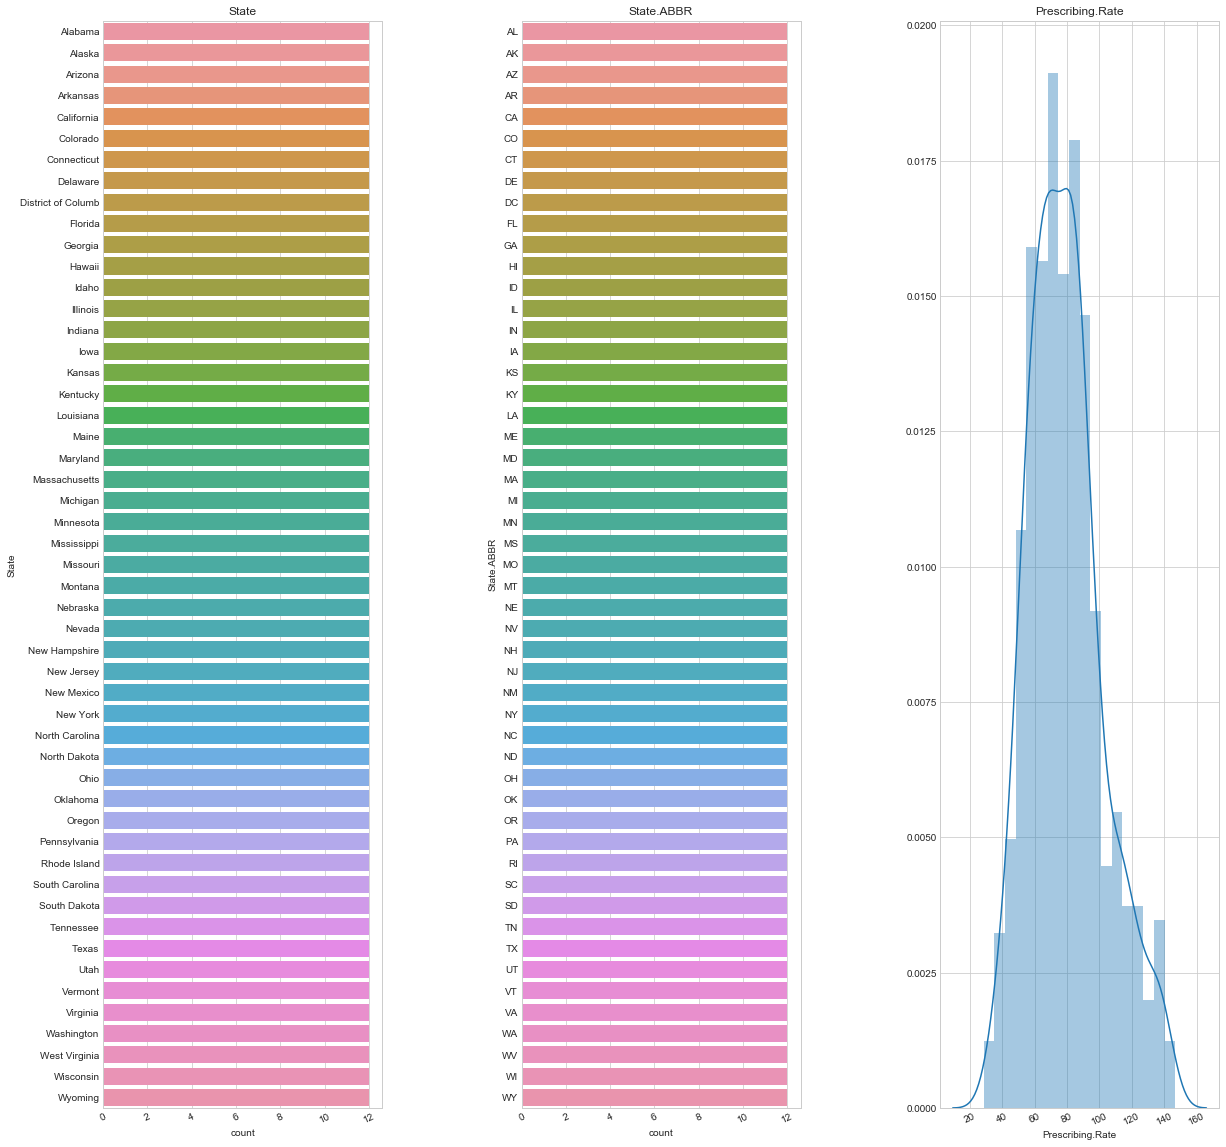

In [24]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(cdc_state, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)




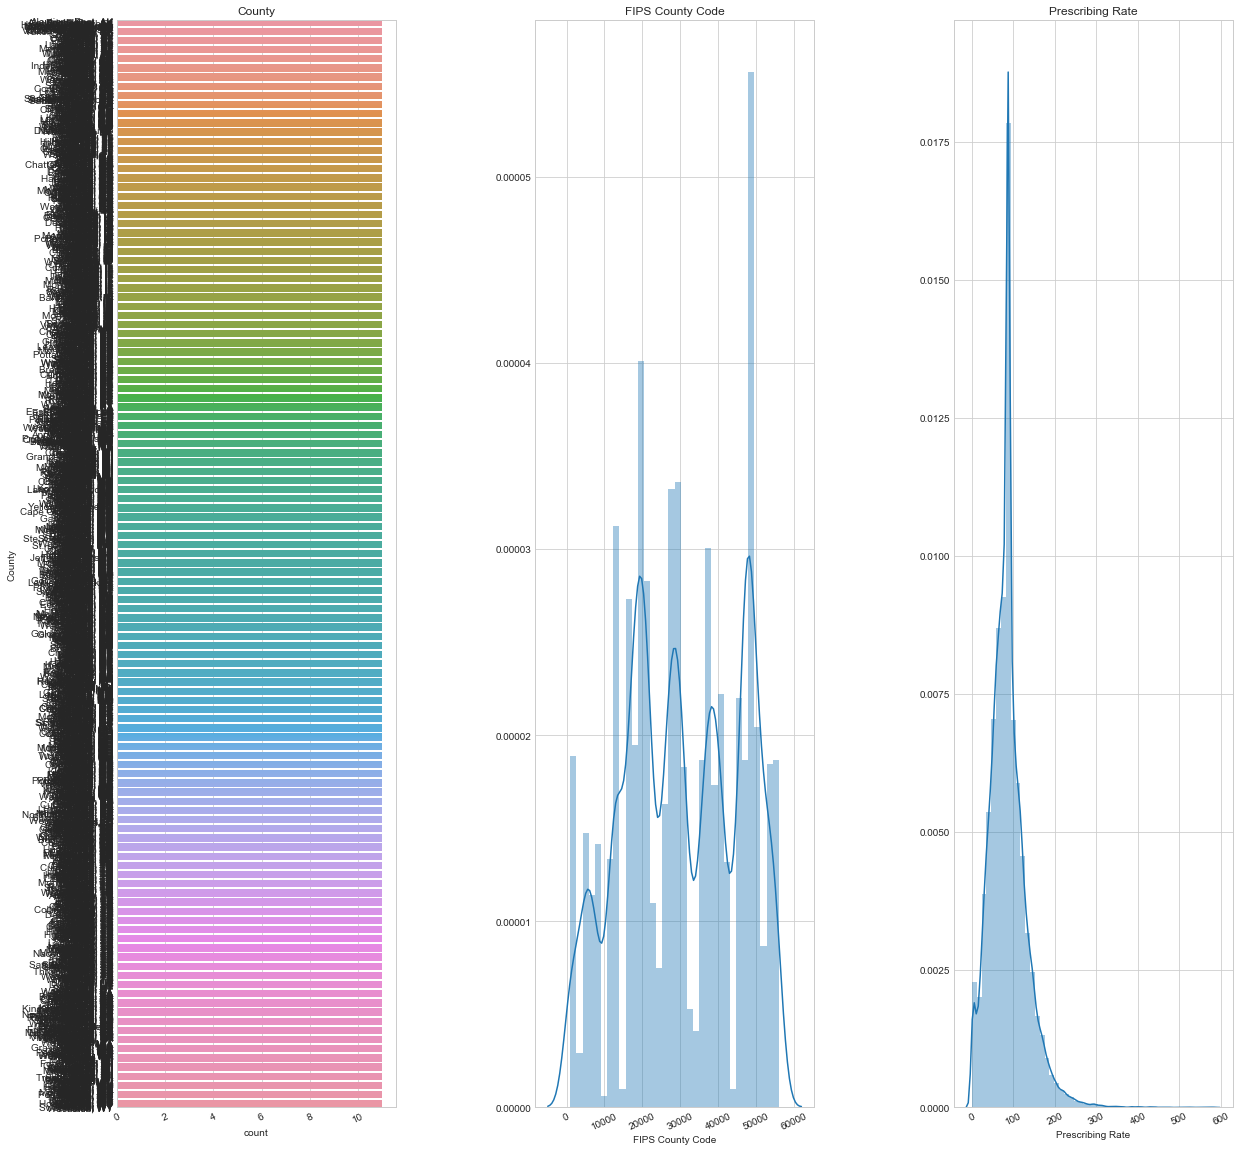

In [25]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
cdc_after_county=cdc_county.fillna(cdc_county.mean())    
plot_distribution(cdc_after_county, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



## What missing values are there?

State               0
State.ABBR          0
Prescribing.Rate    0
dtype: int64

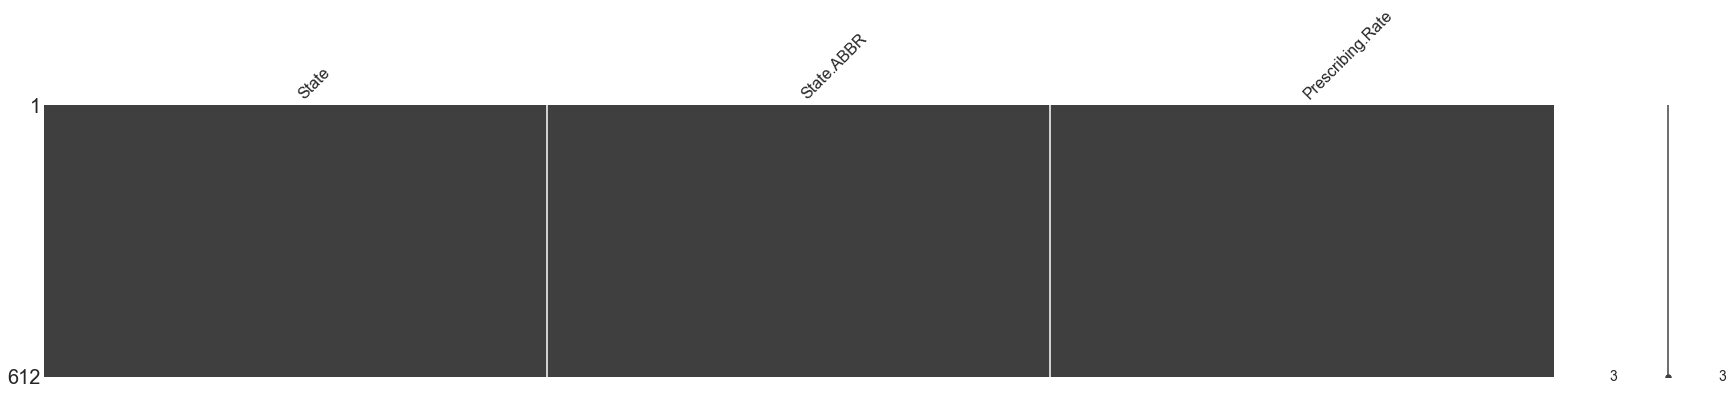

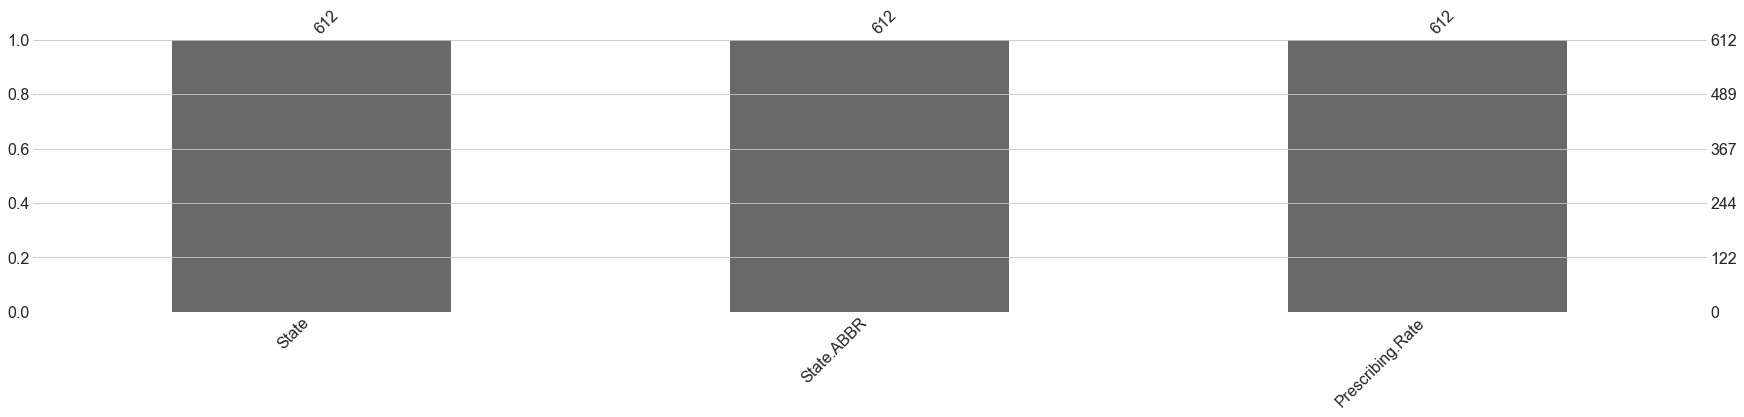

In [22]:
# How many missing values are there in our dataset?
missingno.matrix(cdc_state, figsize = (30,5))

missingno.bar(cdc_state, sort='ascending', figsize = (30,5))

## Tabbular format

cdc_state.isnull().sum()

County                 0
FIPS County Code       0
Prescribing Rate    3705
dtype: int64

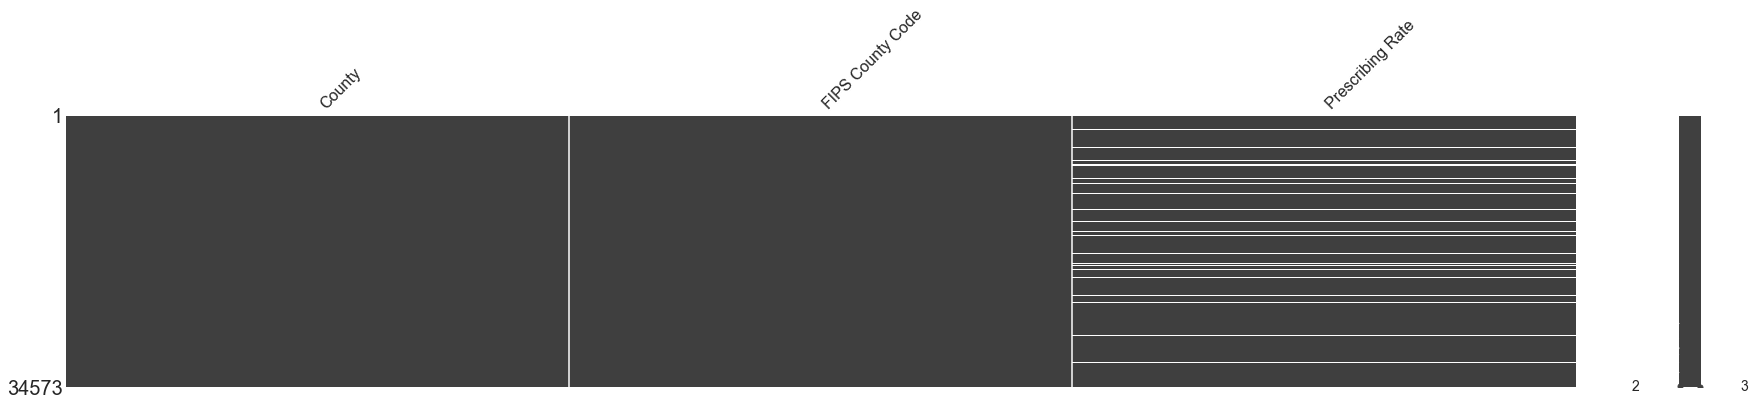

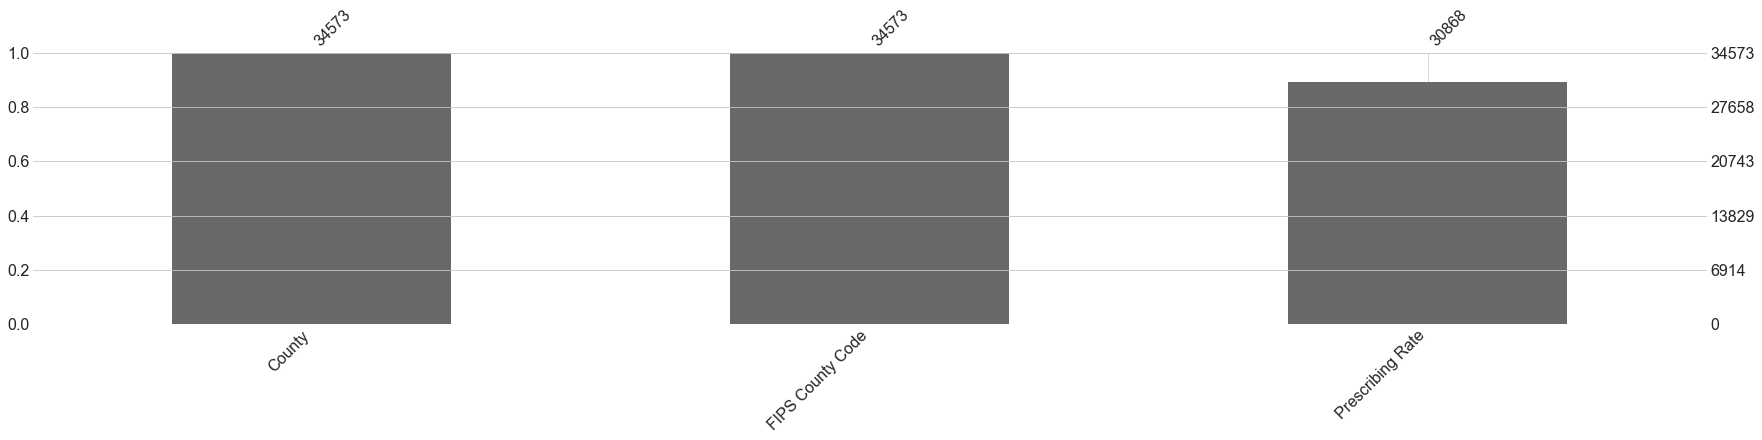

In [23]:
# How many missing values are there in cdc county level data?
missingno.matrix(cdc_county, figsize = (30,5))

missingno.bar(cdc_county, sort='ascending', figsize = (30,5))

## Tabbular format

cdc_county.isnull().sum()